In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# 지역별 14세미만 인구수 csv가 18개 있음
# 그것을 하나의 데이터프레임을 병합함 

In [3]:
data_list = os.listdir('./data/14세미만_인구수')

In [4]:
dataset = {}

for data in data_list:
    dataset[data] = pd.read_csv(f'./data/14세미만_인구수/{data}', encoding='cp949', index_col = 0)

In [5]:
len(data_list)

18

In [6]:
num = 0

for i in dataset:
    num += 1
    globals()['df_'+str(num)] = dataset[i]

In [7]:
dataframes = []
num = 1

for i in range(1, len(data_list)+1):
    dataframes.append(globals()['df_'+str(num)])
    num += 1

In [8]:
population_df = pd.concat(dataframes)

In [9]:
population_df.reset_index(inplace=True)

In [10]:
population_df.rename(columns={'index':'지역'}, inplace=True)

In [11]:
population_df

,지역,연령별,2018_총인구(명),2018_남자(명),2018_여자(명),2019_총인구(명),2019__남자(명),2019__여자(명),2020_총인구(명),2020_남자(명),2020_여자(명),2021_총인구(명),2021_남자(명),2021_여자(명),2022_총인구(명),2022_남자(명),2022_여자(명)
0,강원도,합계,1520391,768604,751787,1520127,767717,752410,1521763,767674,754089,1521890,767067,754823,1528037,770518,757519
1,강원도,0세,8522,4349,4173,8320,4245,4075,8052,4086,3966,7536,3853,3683,7368,3754,3614
2,강원도,1세,9279,4761,4518,8672,4431,4241,8509,4339,4170,8156,4148,4008,7709,3932,3777
3,강원도,2세,10425,5372,5053,9366,4800,4566,8836,4510,4326,8611,4374,4237,8285,4231,4054
4,강원도,3세,10965,5548,5417,10542,5421,5121,9471,4866,4605,8871,4523,4348,8637,4399,4238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,충청북도,10세,14433,7509,6924,13739,7193,6546,14410,7403,7007,15000,7678,7322,14966,7644,7322
284,충청북도,11세,14883,7672,7211,14440,7509,6931,13789,7199,6590,14428,7404,7024,14976,7670,7306
285,충청북도,12세,13505,6948,6557,14940,7710,7230,14462,7525,6937,13800,7194,6606,14414,7405,7009
286,충청북도,13세,13453,6981,6472,13571,7006,6565,15088,7762,7326,14517,7563,6954,13768,7183,6585


In [12]:
population_2022 = population_df[['지역', '연령별', '2022_총인구(명)', '2022_남자(명)', '2022_여자(명)']]

In [13]:
population_2022.columns = ['지역', '연령', '총인구', '남자인구수', '여자인구수']

In [14]:
population_2022

,지역,연령,총인구,남자인구수,여자인구수
0,강원도,합계,1528037,770518,757519
1,강원도,0세,7368,3754,3614
2,강원도,1세,7709,3932,3777
3,강원도,2세,8285,4231,4054
4,강원도,3세,8637,4399,4238
...,...,...,...,...,...
283,충청북도,10세,14966,7644,7322
284,충청북도,11세,14976,7670,7306
285,충청북도,12세,14414,7405,7009
286,충청북도,13세,13768,7183,6585


In [15]:
# 만나이이므로 7 ~ 12세 까지 초등학생임. 
# 0 ~ 6 : 미취학아동
# 7 ~ 12 : 초등학생 
# 그럼 13, 14세는 필요없으므로 삭제하고 미취학아동과 초등학생을 분리함 

In [16]:
population_2022 = population_2022[(population_2022['연령'] != '합계') & (population_2022['연령'] != '13세') & (population_2022['연령'] != '14세')]

In [17]:
population_2022['연령'] = population_2022['연령'].str.extract('(\d+)').astype(int)

C:\Users\BIG2-003-008\AppData\Local\Temp\ipykernel_17580\1200026347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2022['연령'] = population_2022['연령'].str.extract('(\d+)').astype(int)


In [18]:
age_groups = pd.cut(population_2022['연령'], bins=[0, 6, 12], labels=['미취학아동수', '초등학생수'])
result = population_2022.groupby(['지역', age_groups])['총인구'].sum().unstack()

In [19]:
result = result.rename_axis(index=None, columns='지역')
result.columns.name = None

In [20]:
result.reset_index(inplace=True)

In [21]:
result.rename(columns={'index':'지역'}, inplace=True)

In [22]:
result

,지역,미취학아동수,초등학생수
0,강원도,54048,72717
1,경기도,592722,785479
2,경상남도,127228,189026
3,경상북도,92299,128444
4,광주광역시,59968,85287
5,대구광역시,87777,123379
6,대전광역시,56729,78252
7,부산광역시,113899,156867
8,서울특별시,305146,400716
9,세종특별자치시,26072,32677


In [23]:
# 전국 초등학교 수

sc_df = pd.read_csv('./data/2022_전국_초등학교_수.csv', encoding='cp949', index_col = 0)

In [24]:
sc_df = sc_df[['학교수', '학생수', '여학생수']]

In [25]:
sc_df.reset_index(inplace=True)

In [26]:
sc_df

,지역,학교수,학생수,여학생수
0,서울,609,393565,191926
1,부산,304,154858,75306
2,대구,233,121485,59284
3,인천,260,155906,75946
4,광주,155,83929,40670
5,대전,149,76960,37319
6,울산,121,66450,32133
7,세종,52,32230,15693
8,경기,1320,767346,374988
9,강원,349,71530,34841


In [27]:
sc_df['남학생수'] = sc_df['학생수'] - sc_df['여학생수']

In [28]:
sc_df['지역'] = sc_df['지역'].replace(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'],
                 ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도',
                 '강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도'])

In [29]:
population_2022_fin = pd.merge(sc_df, result, on = '지역')
population_2022_fin

,지역,학교수,학생수,여학생수,남학생수,미취학아동수,초등학생수
0,서울특별시,609,393565,191926,201639,305146,400716
1,부산광역시,304,154858,75306,79552,113899,156867
2,대구광역시,233,121485,59284,62201,87777,123379
3,인천광역시,260,155906,75946,79960,120163,160654
4,광주광역시,155,83929,40670,43259,59968,85287
5,대전광역시,149,76960,37319,39641,56729,78252
6,울산광역시,121,66450,32133,34317,47609,66870
7,세종특별자치시,52,32230,15693,16537,26072,32677
8,경기도,1320,767346,374988,392358,592722,785479
9,강원도,349,71530,34841,36689,54048,72717


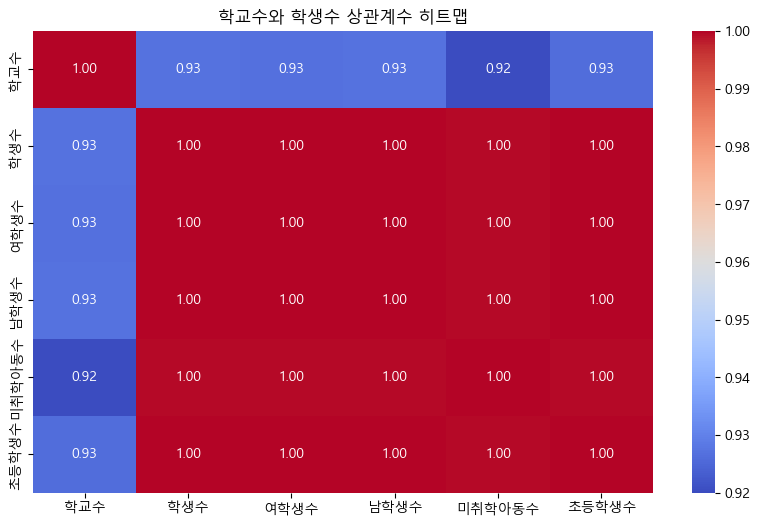

In [50]:
# 히트맵 그리기

population_heat = population_2022_fin.drop(columns = {'지역'})

sns.heatmap(population_heat.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('학교수와 학생수 상관계수 히트맵')
plt.show()

* 위의 변수들은 모두 강한 선형 상관관계를 보이므로 하나의 데이터만 사용해도 될 것으로 판단됨. 
* 그래서 학교수만 사용하기로 결정

In [31]:
pdf_2022 = population_2022_fin[['지역', '학교수']]

In [32]:
pdf_2022_2 = population_2022_fin[['지역', '미취학아동수', '초등학생수']]

In [33]:
data = pd.read_csv('./data/통합데이터.csv')

In [34]:
data['지역'] = data['지역'].replace(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'],
                 ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도',
                 '강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도'])

In [35]:
data

,지역,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
0,경기도,378,861,21937,34.6
1,서울특별시,111,386,25256,47.3
2,경상남도,88,159,20650,24.9
3,인천광역시,69,112,21317,29.8
4,부산광역시,60,155,21352,32.8
5,충청남도,57,67,21262,23.3
6,대구광역시,55,85,21046,37.4
7,경상북도,45,123,20667,26.4
8,전라남도,41,55,20881,22.4
9,전라북도,35,59,20862,23.9


In [36]:
data_df = pd.merge(pdf_2022, data, on = '지역')
data_df

,지역,학교수,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
0,서울특별시,609,111,386,25256,47.3
1,부산광역시,304,60,155,21352,32.8
2,대구광역시,233,55,85,21046,37.4
3,인천광역시,260,69,112,21317,29.8
4,광주광역시,155,16,46,22472,27.4
5,대전광역시,149,17,35,22730,34.1
6,울산광역시,121,16,16,25165,26.7
7,세종특별자치시,52,1,25,22061,33.1
8,경기도,1320,378,861,21937,34.6
9,강원도,349,12,48,21038,24.6


In [37]:
data_df['1인당 개인소득(만원)'] = data_df['1인당 개인소득(천원)'] / 10

In [65]:
data_df.columns

Index(['지역', '학교수', '지점수(미래엔)', '지점수(해법)', '1인당 개인소득(천원)', '초등생_사교육지출(만원)',
       '1인당 개인소득(만원)', '점유율'],
      dtype='object')

In [67]:
data_df[['지역', '학교수', '지점수(미래엔)', '지점수(해법)', '초등생_사교육지출(만원)','1인당 개인소득(만원)']]

,지역,학교수,지점수(미래엔),지점수(해법),초등생_사교육지출(만원),1인당 개인소득(만원)
0,서울특별시,609,111,386,47.3,2525.6
1,부산광역시,304,60,155,32.8,2135.2
2,대구광역시,233,55,85,37.4,2104.6
3,인천광역시,260,69,112,29.8,2131.7
4,광주광역시,155,16,46,27.4,2247.2
5,대전광역시,149,17,35,34.1,2273.0
6,울산광역시,121,16,16,26.7,2516.5
7,세종특별자치시,52,1,25,33.1,2206.1
8,경기도,1320,378,861,34.6,2193.7
9,강원도,349,12,48,24.6,2103.8


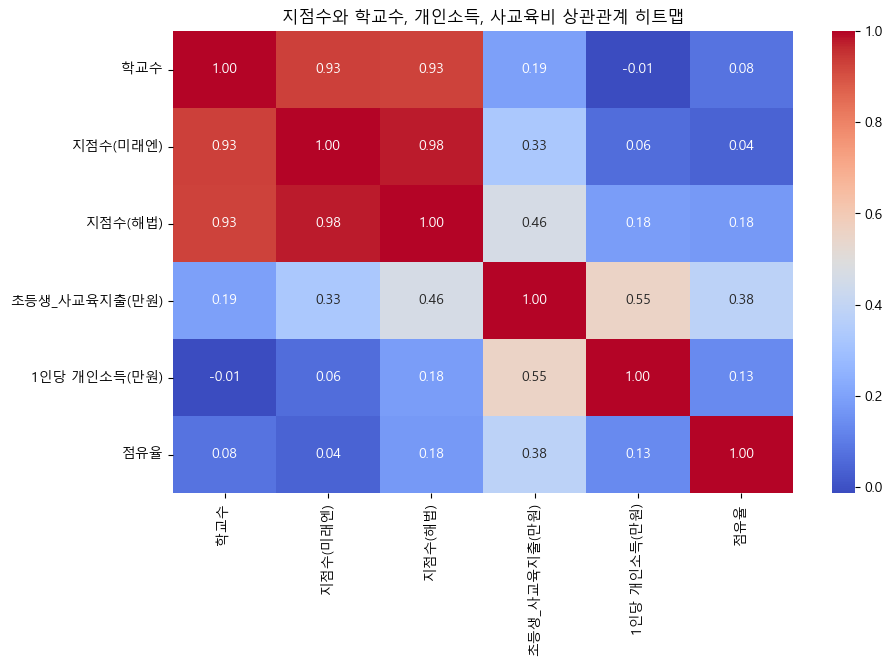

In [51]:
# 히트맵 그리기

data_heat = data_df.drop(columns = {'지역', '1인당 개인소득(천원)'})

sns.heatmap(data_heat.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('지점수와 학교수, 개인소득, 사교육비 상관관계 히트맵')
plt.show()

* 1인당 개인소득(만원)과 초등생 사교육지출(만원)은 약한 상관관계를 보이고 있다.
* 해법 지점수와 초등생 사교육지출(만원)은 약한 상관관계를 보이고 있다.

In [40]:
# 점유율
# 여러 공부방이 있지만,
# 경쟁사(한솔)과 스마트해법만 있다고 가정

data_df['점유율'] = data_df['지점수(해법)'] / (data_df['지점수(미래엔)'] + data_df['지점수(해법)']) * 100

In [41]:
data_df.sort_values('점유율', ascending=False)

,지역,학교수,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원),1인당 개인소득(만원),점유율
7,세종특별자치시,52,1,25,22061,33.1,2206.1,96.153846
9,강원도,349,12,48,21038,24.6,2103.8,80.000000
0,서울특별시,609,111,386,25256,47.3,2525.6,77.665996
4,광주광역시,155,16,46,22472,27.4,2247.2,74.193548
14,경상북도,473,45,123,20667,26.4,2066.7,73.214286
1,부산광역시,304,60,155,21352,32.8,2135.2,72.093023
8,경기도,1320,378,861,21937,34.6,2193.7,69.491525
5,대전광역시,149,17,35,22730,34.1,2273.0,67.307692
15,경상남도,510,88,159,20650,24.9,2065.0,64.372470
12,전라북도,421,35,59,20862,23.9,2086.2,62.765957


In [42]:
gg = pd.read_csv('./data/경기도_행정구역별_초등학교_사교육비.csv', encoding='cp949')

In [43]:
gg.sort_values('초등학교 사교육비', ascending=False)

,행정구역별,초등학교 사교육비
1,성남시,68.3
11,구리시,63.4
10,과천시,61.9
9,고양시,59.4
18,용인시,57.8
17,하남시,57.5
3,안양시,57.2
5,광명시,55.3
23,화성시,55.0
0,수원시,54.2


* 성남시 초등학생 1인당 사교육비는 68.3 만원으로 조사되었으며, 그 중 분당구는 74.3 만원으로 매우 높은 것을 확인했다. 

In [44]:
data_df_fin = pd.merge(data_df, pdf_2022_2, on = '지역')
data_df_fin

,지역,학교수,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원),1인당 개인소득(만원),점유율,미취학아동수,초등학생수
0,서울특별시,609,111,386,25256,47.3,2525.6,77.665996,305146,400716
1,부산광역시,304,60,155,21352,32.8,2135.2,72.093023,113899,156867
2,대구광역시,233,55,85,21046,37.4,2104.6,60.714286,87777,123379
3,인천광역시,260,69,112,21317,29.8,2131.7,61.878453,120163,160654
4,광주광역시,155,16,46,22472,27.4,2247.2,74.193548,59968,85287
5,대전광역시,149,17,35,22730,34.1,2273.0,67.307692,56729,78252
6,울산광역시,121,16,16,25165,26.7,2516.5,50.000000,47609,66870
7,세종특별자치시,52,1,25,22061,33.1,2206.1,96.153846,26072,32677
8,경기도,1320,378,861,21937,34.6,2193.7,69.491525,592722,785479
9,강원도,349,12,48,21038,24.6,2103.8,80.000000,54048,72717


In [61]:
data_df_fin = data_df_fin.drop(columns = {'지점비율(해법)', '지점비율(미래엔)'})

In [62]:
data_df_fin.sort_values('점유율').reset_index(drop=True)

,지역,학교수,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원),1인당 개인소득(만원),점유율,미취학아동수,초등학생수,학생 1명당 지점수(해법),학생 1명당 지점수(미래엔)
0,제주특별자치도,114,19,15,20475,27.0,2047.5,44.117647,30992,43573,0.000344,0.000436
1,울산광역시,121,16,16,25165,26.7,2516.5,50.000000,47609,66870,0.000239,0.000239
2,충청남도,411,57,67,21262,23.3,2126.2,54.032258,87368,120104,0.000558,0.000475
3,전라남도,426,41,55,20881,22.4,2088.1,57.291667,64065,91269,0.000603,0.000449
4,충청북도,256,32,49,21081,27.9,2108.1,60.493827,62474,84940,0.000577,0.000377
5,대구광역시,233,55,85,21046,37.4,2104.6,60.714286,87777,123379,0.000689,0.000446
6,인천광역시,260,69,112,21317,29.8,2131.7,61.878453,120163,160654,0.000697,0.000429
7,전라북도,421,35,59,20862,23.9,2086.2,62.765957,60303,92048,0.000641,0.000380
8,경상남도,510,88,159,20650,24.9,2065.0,64.372470,127228,189026,0.000841,0.000466
9,대전광역시,149,17,35,22730,34.1,2273.0,67.307692,56729,78252,0.000447,0.000217


In [52]:
data_df_fin['학생 1명당 지점수(해법)'] = data_df_fin['지점수(해법)'] / data_df_fin['초등학생수'] 

In [53]:
data_df_fin['학생 1명당 지점수(미래엔)'] = data_df_fin['지점수(미래엔)'] / data_df_fin['초등학생수']

In [54]:
data_df_fin.sort_values('학생 1명당 지점수(해법)')

,지역,학교수,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원),1인당 개인소득(만원),점유율,미취학아동수,초등학생수,지점비율(해법),지점비율(미래엔),학생 1명당 지점수(해법),학생 1명당 지점수(미래엔)
6,울산광역시,121,16,16,25165,26.7,2516.5,50.000000,47609,66870,0.000239,0.000239,0.000239,0.000239
16,제주특별자치도,114,19,15,20475,27.0,2047.5,44.117647,30992,43573,0.000344,0.000436,0.000344,0.000436
5,대전광역시,149,17,35,22730,34.1,2273.0,67.307692,56729,78252,0.000447,0.000217,0.000447,0.000217
4,광주광역시,155,16,46,22472,27.4,2247.2,74.193548,59968,85287,0.000539,0.000188,0.000539,0.000188
11,충청남도,411,57,67,21262,23.3,2126.2,54.032258,87368,120104,0.000558,0.000475,0.000558,0.000475
10,충청북도,256,32,49,21081,27.9,2108.1,60.493827,62474,84940,0.000577,0.000377,0.000577,0.000377
13,전라남도,426,41,55,20881,22.4,2088.1,57.291667,64065,91269,0.000603,0.000449,0.000603,0.000449
12,전라북도,421,35,59,20862,23.9,2086.2,62.765957,60303,92048,0.000641,0.000380,0.000641,0.000380
9,강원도,349,12,48,21038,24.6,2103.8,80.000000,54048,72717,0.000660,0.000165,0.000660,0.000165
2,대구광역시,233,55,85,21046,37.4,2104.6,60.714286,87777,123379,0.000689,0.000446,0.000689,0.000446


In [55]:
data_df_fin.sort_values('학생 1명당 지점수(미래엔)')

,지역,학교수,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원),1인당 개인소득(만원),점유율,미취학아동수,초등학생수,지점비율(해법),지점비율(미래엔),학생 1명당 지점수(해법),학생 1명당 지점수(미래엔)
7,세종특별자치시,52,1,25,22061,33.1,2206.1,96.153846,26072,32677,0.000765,0.000031,0.000765,0.000031
9,강원도,349,12,48,21038,24.6,2103.8,80.000000,54048,72717,0.000660,0.000165,0.000660,0.000165
4,광주광역시,155,16,46,22472,27.4,2247.2,74.193548,59968,85287,0.000539,0.000188,0.000539,0.000188
5,대전광역시,149,17,35,22730,34.1,2273.0,67.307692,56729,78252,0.000447,0.000217,0.000447,0.000217
6,울산광역시,121,16,16,25165,26.7,2516.5,50.000000,47609,66870,0.000239,0.000239,0.000239,0.000239
0,서울특별시,609,111,386,25256,47.3,2525.6,77.665996,305146,400716,0.000963,0.000277,0.000963,0.000277
14,경상북도,473,45,123,20667,26.4,2066.7,73.214286,92299,128444,0.000958,0.000350,0.000958,0.000350
10,충청북도,256,32,49,21081,27.9,2108.1,60.493827,62474,84940,0.000577,0.000377,0.000577,0.000377
12,전라북도,421,35,59,20862,23.9,2086.2,62.765957,60303,92048,0.000641,0.000380,0.000641,0.000380
1,부산광역시,304,60,155,21352,32.8,2135.2,72.093023,113899,156867,0.000988,0.000382,0.000988,0.000382
